<a href="https://colab.research.google.com/github/bobbykawade/Logistic-Regression/blob/main/MNIST_Hand_Written_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau

- All images are labelled with the respective digit they represent.

- MNIST is the hello world of Machine Learning.

- There are 70,000 images and each images has 784 features.

- Each image is 28 x 28 pixels and each features simply represents one pixel's intensity, from 0(white) to 255(black).

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Fetching Datasets
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784')

In [4]:
#mnist

In [5]:
x, y = mnist['data'], mnist['target']

In [6]:
#x[0]

In [7]:
x.shape

(70000, 784)

In [8]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [9]:
y.shape

(70000,)

In [10]:
%matplotlib inline

In [11]:
some_digit = x[36001]
some_digit_image = some_digit.reshape(28,28) #lets reshape it to plot it

(-0.5, 27.5, 27.5, -0.5)

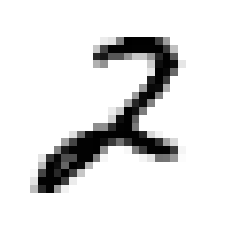

In [12]:
import matplotlib
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation = "nearest")
plt.axis('off')

In [13]:
y[36001]

'2'

In [14]:
# Splitting Train- test in 60000 in trainand 10000 into test
x_train, x_test = x[:60000], x[60000:]

In [15]:
y_train, y_test = y[:60000], y[60000:]

In [16]:
# Use Shuffling for Randomness of Datasets
shuffle_index = np.random.permutation(60000)

x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [17]:
# Creating a 2 number detector (Binary Classifier)
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

In [18]:
y_test.dtype

dtype('int8')

In [19]:
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [20]:
y_train_2 = y_train_2.astype(np.int8)
y_test_2 = y_test_2.astype(np.int8)

In [21]:
y_train_2.dtype

dtype('int8')

In [22]:
y_test_2.dtype

dtype('int8')

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
# Training the Model
clf = LogisticRegression()
#or we can use for less tolerance clf = LogisticRegression(tol = 0.1, solver = 'lbfgs')

In [25]:
clf.fit(x_train, y_train_2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
clf.predict([some_digit])

array([1], dtype=int8)

In [27]:
# Cross Validation
from sklearn.model_selection import cross_val_score

a = cross_val_score(clf, x_train, y_train_2, cv = 3, scoring = "accuracy")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [28]:
a.mean()

0.9783166666666667

In [29]:
# Quiz - Create a Classifier a digit is not always 2

In [30]:
#Confusion Matrix, Precision, Recall & F1 Score
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, x_train, y_train_2, cv = 3)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [31]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [32]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

In [33]:
confusion_matrix(y_train_2, y_train_pred)

array([[53577,   465],
       [  836,  5122]])

In [35]:
# Precision & Recall
from sklearn.metrics import precision_score, recall_score

In [36]:
precision_score(y_train_2, y_train_pred)

0.9167710757114731

In [37]:
recall_score(y_train_2, y_train_pred)

0.8596844578717691

In [38]:
# F1 Score - Harmonic Mean of Precision and Recall
from sklearn.metrics import f1_score

In [39]:
f1_score(y_train_2, y_train_pred)

0.8873105240363794

# Precision-Recall Curve

Precision-Recall Tradeoff - if Precision increases we need to decrease recall and vice-versa.

In [40]:
from sklearn.metrics import precision_recall_curve

In [45]:
y_scores = cross_val_predict(clf, x_train, y_train_2, cv = 3, method = "decision_function")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [46]:
y_scores

array([ -3.58281445,  -6.65998072,  -6.65724157, ...,  -7.34751227,
       -10.79078268,  -4.32790855])

In [47]:
precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_scores)

In [48]:
precisions

array([0.1008173 , 0.10080208, 0.10080379, ..., 1.        , 1.        ,
       1.        ])

In [49]:
recalls

array([1.00000000e+00, 9.99832158e-01, 9.99832158e-01, ...,
       3.35683115e-04, 1.67841558e-04, 0.00000000e+00])

In [50]:
thresholds

array([-24.79690215, -24.79499916, -24.79491208, ...,  16.97333019,
        18.96514352,  19.15419118])

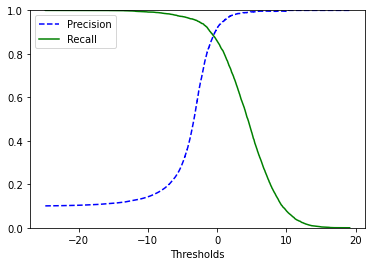

In [53]:
## Plotting Precision-Recall Curve
plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")
plt.xlabel("Thresholds")
plt.legend(loc = "upper left")
plt.ylim([0,1])
plt.show()